In [1]:
%pip install pandas matplotlib seaborn



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

df = pd.read_csv("./output/v2i_packets.csv")

# Filter successful packets
df_success = df[df['success'] == True]


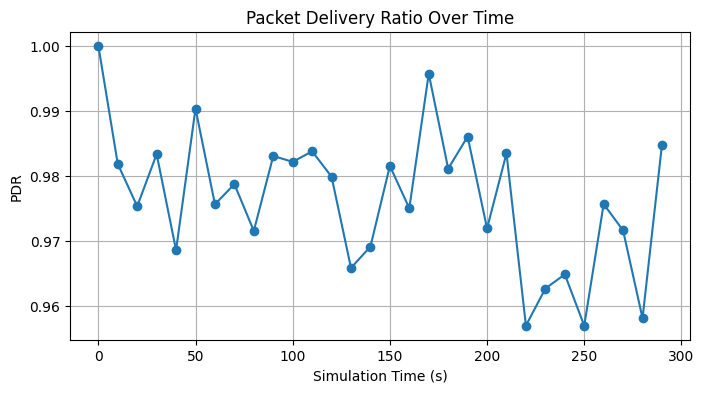

In [4]:
import matplotlib.pyplot as plt

# Bin time into 10-second intervals
df['time_bin'] = (df['gen_time'] // 10) * 10
pdr_time = df.groupby('time_bin')['success'].mean()

plt.figure(figsize=(8,4))
plt.plot(pdr_time.index, pdr_time.values, marker='o')
plt.title("Packet Delivery Ratio Over Time")
plt.xlabel("Simulation Time (s)")
plt.ylabel("PDR")
plt.grid(True)
plt.show()


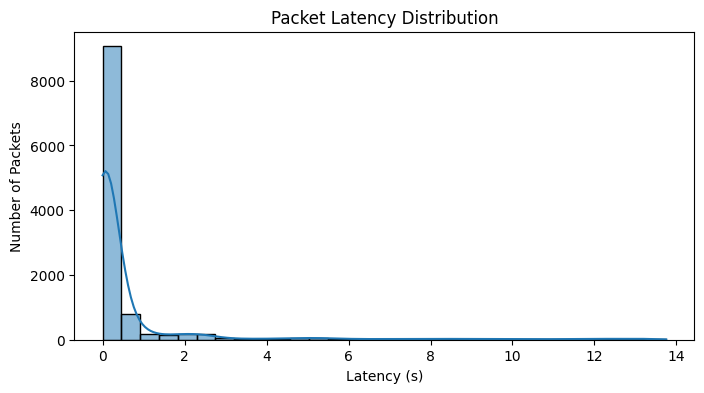

In [5]:
import seaborn as sns

latency = df_success['rx_time'] - df_success['gen_time']

plt.figure(figsize=(8,4))
sns.histplot(latency, bins=30, kde=True)
plt.title("Packet Latency Distribution")
plt.xlabel("Latency (s)")
plt.ylabel("Number of Packets")
plt.show()


In [7]:
rsu_util = pd.read_csv("./output/v2i_metrics.csv")['rsu_utilization'].iloc[0]

# Since RSU utilization is a dict, convert to DataFrame
import ast
util_dict = ast.literal_eval(rsu_util)
df_util = pd.DataFrame(list(util_dict.items()), columns=['RSU', 'Utilization'])

plt.figure(figsize=(8,4))
sns.barplot(data=df_util, x='RSU', y='Utilization')
plt.xticks(rotation=45)
plt.title("RSU Utilization")
plt.ylabel("Fraction of Busy Time")
plt.show()


KeyError: 'rsu_utilization'

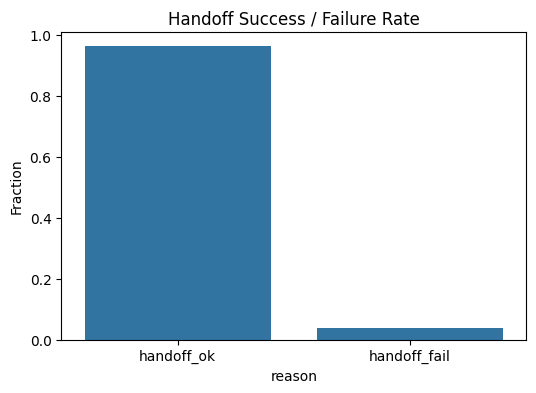

In [8]:
handoff = df[df['reason'].isin(['handoff_ok','handoff_fail'])]
handoff_rate = handoff['reason'].value_counts(normalize=True)

plt.figure(figsize=(6,4))
sns.barplot(x=handoff_rate.index, y=handoff_rate.values)
plt.title("Handoff Success / Failure Rate")
plt.ylabel("Fraction")
plt.show()


C:\Users\vishe\AppData\Local\Temp\ipykernel_28656\3993636711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_success['time_bin'] = (df_success['rx_time'] // 10) * 10


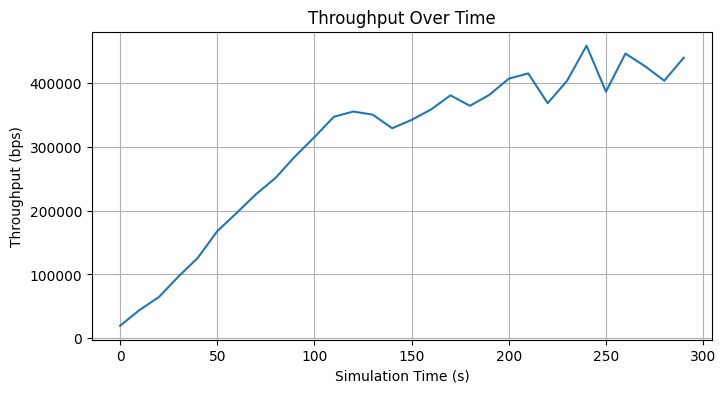

In [9]:
df_success['time_bin'] = (df_success['rx_time'] // 10) * 10
throughput_time = df_success.groupby('time_bin')['size_bits'].sum() / 10  # bits/sec

plt.figure(figsize=(8,4))
plt.plot(throughput_time.index, throughput_time.values)
plt.title("Throughput Over Time")
plt.xlabel("Simulation Time (s)")
plt.ylabel("Throughput (bps)")
plt.grid(True)
plt.show()
